In [1]:
import pandas as pd
import numpy as np 
import requests
import os
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering 

In [2]:
df = pd.read_csv("twitter-archive-enhanced.csv")
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image-predictions.tsv', 'wb').write(r.content)

335079

In [4]:
images = pd.read_table('image-predictions.tsv', sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
"""
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)
"""

"\nconsumer_key = ''\nconsumer_secret = ''\naccess_token = ''\naccess_secret = ''\n\nauth = tweepy.OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth)\n"

In [6]:
"""
tweet_list = {}
for tweet in list(df.tweet_id):
    try:
        tweet_data = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
       
        tweet_list[str(tweet)] = tweet_data._json
    except: 
        print("no tweet for: " + str(tweet))
"""

'\ntweet_list = {}\nfor tweet in list(df.tweet_id):\n    try:\n        tweet_data = api.get_status(tweet, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)\n       \n        tweet_list[str(tweet)] = tweet_data._json\n    except: \n        print("no tweet for: " + str(tweet))\n'

In [7]:
"""
with open('tweets.txt', 'w') as outfile:  
    json.dump(tweet_list, outfile, sort_keys = True, indent=4)
"""

"\nwith open('tweets.txt', 'w') as outfile:  \n    json.dump(tweet_list, outfile, sort_keys = True, indent=4)\n"

In [8]:
tweets = pd.read_json('tweets.txt',orient='index')
tweets.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2531,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,126,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,123,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,292,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,136,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,106,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


## Assessment 

Timestamp coulums should be in time format and tweet_id should be a string

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

The df doggo, floofer, pupper and puppo colums have none instead of NaN

In [10]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Some of the names of the dogs are not names examples are none or a or an thease should all be replaced with NaN

In [11]:
df['name'].value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
Bailey         7
an             7
Buddy          7
Toby           7
Daisy          7
Stanley        6
Rusty          6
Leo            6
Scout          6
Koda           6
Bella          6
Dave           6
Jack           6
Jax            6
Milo           6
Oscar          6
Sammy          5
            ... 
Jebberson      1
Cora           1
Gabby          1
Boots          1
Olaf           1
DonDon         1
Halo           1
Florence       1
Fiji           1
Skittles       1
Sailer         1
William        1
Aqua           1
General        1
Tove           1
Harrison       1
Hazel          1
Harvey         1
Jay            1
Zeek           1
Skittle        1
Dot            1
Jackie         1
Eleanor        1
Socks          1
Glacier        1
Teddy          1
Sundance      

df has 2356 rows and images has 2075 so some tweets have no image

In [12]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There are 181 retweets that need to be deleted 

In [13]:
df['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

the Rating_numerator and rating_denominator should be floats some values need fixing (I decided against changing this as the values apper to be excagerated for humor)

In [14]:
df["rating_numerator"].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Some coloumns have allot of NaN values but are not important so will delete thease coloumns 

In [15]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

### Quality 
1. timestamp coulums should be in time format and tweet_id should be a string
2. tweet_Id should have the same name in every dataframe
3. the df doggo, floofer, pupper and puppo colums have none instead of NaN
4. some of the names of the dogs are not names examples are none or a or an thease should all be replaced with NaN
5. some tweets have no image 
6. delete retweets
7. delete dogs that don't have a name  
8. some coloumns have allot of NaN values but are not important so will delete thease coloumns 

### Tidyness
1. create a dog stages column 
2. join the 3 dataframes and save a CSV file named twitter_archive_master.csv

### Cleaning

***Make a copy for cleaning***

In [16]:
#make a copy of each dataframe to clean
df_clean = df.copy()
image_clean = images.copy()
tweets_clean = tweets.copy()


***Define*** 

change datatypes that are erroneous

***Code***

In [17]:
#change timestamp to time format
df_clean["timestamp"] = pd.to_datetime(df_clean["timestamp"])

In [18]:
#change tweet_id to string
df_clean["tweet_id"] = df_clean["tweet_id"].astype(str)
image_clean["tweet_id"] = image_clean["tweet_id"].astype(str)
tweets_clean["id_str"] = tweets_clean["id_str"].astype(str)

***Test***

In [19]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [20]:
df_clean["timestamp"].head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [22]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [23]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2

***Define***

tweet_Id should have the same name in every dataframe

***Code***

In [24]:
#copying "id_str" as "tweet_id"
tweets_clean["tweet_id"] = tweets_clean["id_str"]

***Test***

In [25]:
tweets_clean.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,tweet_id
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2531,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,498,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ...",666020888022790144
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,126,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ...",666029285002620928
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,123,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ...",666033412701032448
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,292,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,136,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ...",666044226329800704
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,106,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ...",666049248165822464


***Define***

The df doggo, floofer, pupper and puppo colums have none instead of NaN

***Code***

In [26]:
df_clean["doggo"].replace('None', np.nan, inplace=True)
df_clean["floofer"].replace('None', np.nan, inplace=True)
df_clean["pupper"].replace('None', np.nan, inplace=True)
df_clean["puppo"].replace('None', np.nan, inplace=True)

***Test***

In [27]:
df_clean.iloc[:, -4:].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


***Define***


some of the names of the dogs are not names examples are none or a or an thease should all be replaced with NaN

***Code***

In [28]:
# replace "None", "a" and "unacceptable" with NaN
df_clean["name"].replace("None", np.nan, inplace=True)
df_clean["name"].replace("a", np.nan, inplace=True)
df_clean["name"].replace("unacceptable", np.nan, inplace=True)

***Test***

In [29]:
df_clean["name"].value_counts()

Charlie      12
Oliver       11
Lucy         11
Cooper       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Toby          7
Buddy         7
Daisy         7
Bailey        7
Koda          6
Dave          6
Leo           6
Bella         6
Jack          6
Stanley       6
Milo          6
Oscar         6
Jax           6
Scout         6
Rusty         6
Bentley       5
Alfie         5
Gus           5
             ..
Hall          1
Jebberson     1
Cora          1
Gabby         1
Boots         1
DonDon        1
Florence      1
Skittles      1
Fiji          1
Sailer        1
William       1
Lambeau       1
Aqua          1
General       1
Tove          1
Harrison      1
Hazel         1
Harvey        1
Jay           1
Zeek          1
Skittle       1
Dot           1
Jackie        1
Eleanor       1
Socks         1
Glacier       1
Teddy         1
Sundance      1
Jockson       1
Barry         1
Name: name, Length: 954,

***Define***

delete tweets that have no image

***Code***

In [30]:
# drop rows without an image url
df_clean = df_clean.dropna(subset=["expanded_urls"])

***Test***

In [31]:
sum(df_clean["expanded_urls"].isnull())

0

***Define***

delete retweets

***Code***

In [32]:
# keep rows where "reteeted_status_id" is NaN
df_clean = df_clean[df_clean["retweeted_status_id"].isnull()]

***Test***

In [33]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          1439 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        232 non-null object
puppo                         24 non-null object
dtypes: datetime64[ns](1), float64(4

***Define***

delete dogs that don't have a name

***Code***

In [34]:
df_clean = df_clean.dropna(subset=["name"])

***test***

In [35]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 2349
Data columns (total 17 columns):
tweet_id                      1439 non-null object
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     1439 non-null datetime64[ns]
source                        1439 non-null object
text                          1439 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1439 non-null object
rating_numerator              1439 non-null int64
rating_denominator            1439 non-null int64
name                          1439 non-null object
doggo                         45 non-null object
floofer                       5 non-null object
pupper                        133 non-null object
puppo                         16 non-null object
dtypes: datetime64[ns](1), float64(4), 

***Define***

Delete unnessercery coloumns 

***Code***

In [36]:
df_clean = df_clean.drop(["in_reply_to_status_id", 
                          "in_reply_to_user_id", 
                          "retweeted_status_id",
                          "retweeted_status_user_id",
                          "retweeted_status_timestamp",
                          ], axis=1)
                        
                         
                        
                         
                        

In [37]:
tweets_clean = tweets_clean.drop(["contributors",
                                  "geo",
                                  "coordinates",
                                  "place",
                                  "in_reply_to_screen_name",
                                  "in_reply_to_status_id",
                                  "in_reply_to_status_id_str",
                                  "in_reply_to_user_id",
                                  "in_reply_to_user_id_str",
                                  "quoted_status",
                                  "quoted_status_id",
                                  "quoted_status_id_str",
                                  "retweeted_status",
                                  ], axis=1)

***Test***

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 2349
Data columns (total 12 columns):
tweet_id              1439 non-null object
timestamp             1439 non-null datetime64[ns]
source                1439 non-null object
text                  1439 non-null object
expanded_urls         1439 non-null object
rating_numerator      1439 non-null int64
rating_denominator    1439 non-null int64
name                  1439 non-null object
doggo                 45 non-null object
floofer               5 non-null object
pupper                133 non-null object
puppo                 16 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 146.1+ KB


In [39]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 18 columns):
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
id                               2340 non-null int64
id_str                           2340 non-null object
is_quote_status                  2340 non-null int64
lang                             2340 non-null object
possibly_sensitive               2205 non-null float64
possibly_sensitive_appealable    2205 non-null float64
retweet_count                    2340 non-null int64
retweeted                        2340 non-null int64
source                           2340 non-null object
text                             2340 non-null object
truncated              

In [40]:
tweets_clean.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 18 columns):
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
id                               2340 non-null int64
id_str                           2340 non-null object
is_quote_status                  2340 non-null int64
lang                             2340 non-null object
possibly_sensitive               2205 non-null float64
possibly_sensitive_appealable    2205 non-null float64
retweet_count                    2340 non-null int64
retweeted                        2340 non-null int64
source                           2340 non-null object
text                             2340 non-null object
truncated              

In [41]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


***Define***

make a coloumn dog stage 

***Code***

In [42]:
# extract from the "text" coloumn what stage a dog is in
tweets_clean['dog_stage'] = tweets_clean['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)

***Test***

In [43]:
tweets_clean['dog_stage'].value_counts()

pupper     264
doggo       87
puppo       33
floofer      4
Name: dog_stage, dtype: int64

**Join the 3 dataframes and save a CSV file named twitter_archive_master.csv**

In [44]:
twitter_archive = pd.merge(image_clean, df_clean,
                           how = 'left', on = 'tweet_id')
                        
twitter_archive = pd.merge(twitter_archive, tweets_clean,
                          how = 'left', on = 'tweet_id')

***Test***

In [45]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 41 columns):
tweet_id                         2075 non-null object
jpg_url                          2075 non-null object
img_num                          2075 non-null int64
p1                               2075 non-null object
p1_conf                          2075 non-null float64
p1_dog                           2075 non-null bool
p2                               2075 non-null object
p2_conf                          2075 non-null float64
p2_dog                           2075 non-null bool
p3                               2075 non-null object
p3_conf                          2075 non-null float64
p3_dog                           2075 non-null bool
timestamp                        1392 non-null datetime64[ns]
source_x                         1392 non-null object
text_x                           1392 non-null object
expanded_urls                    1392 non-null object
rating_numerator         

In [46]:
twitter_archive = twitter_archive.drop(["id", "id_str"],  axis=1)

In [47]:
twitter_archive.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Data Visualisation 

**data for the highest rated dog to get an image**

In [48]:
twitter_archive.iloc[twitter_archive['rating_denominator'].argmax()]

C:\Users\teaca\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


tweet_id                                                        731156023742988288
jpg_url                            https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg
img_num                                                                          1
p1                                                                        lakeside
p1_conf                                                                   0.501767
p1_dog                                                                       False
p2                                                                      breakwater
p2_conf                                                                  0.0513506
p2_dog                                                                       False
p3                                                                    king_penguin
p3_conf                                                                  0.0494438
p3_dog                                                                       False
time

**data for retweets ordered by breed of dog**

In [49]:
twitter_archive.groupby('p1')['retweet_count'].describe()

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
Afghan_hound,2.0,5924.500000,5861.208109,1780.0,3852.25,5924.5,7996.75,10069.0
African_crocodile,1.0,263.000000,NaN,263.0,263.00,263.0,263.00,263.0
African_grey,1.0,1212.000000,NaN,1212.0,1212.00,1212.0,1212.00,1212.0
African_hunting_dog,1.0,1133.000000,NaN,1133.0,1133.00,1133.0,1133.00,1133.0
Airedale,8.0,1295.750000,1390.670316,80.0,635.50,922.5,1350.50,4507.0
American_Staffordshire_terrier,8.0,1945.125000,1247.952545,220.0,1138.25,1925.0,2573.50,3840.0
American_black_bear,1.0,1231.000000,NaN,1231.0,1231.00,1231.0,1231.00,1231.0
Angora,2.0,15453.500000,21445.841567,289.0,7871.25,15453.5,23035.75,30618.0
Appenzeller,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**data for retweets ordered by breed of dog**

In [50]:
twitter_archive.groupby('p1')['favorite_count'].describe()

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
Afghan_hound,2.0,16508.500000,13789.289340,6758.0,11633.25,16508.5,21383.75,26259.0
African_crocodile,1.0,943.000000,NaN,943.0,943.00,943.0,943.00,943.0
African_grey,1.0,5084.000000,NaN,5084.0,5084.00,5084.0,5084.00,5084.0
African_hunting_dog,1.0,1679.000000,NaN,1679.0,1679.00,1679.0,1679.00,1679.0
Airedale,8.0,5052.500000,6865.897944,213.0,1260.75,2522.0,5390.00,21124.0
American_Staffordshire_terrier,8.0,5932.875000,4184.691948,466.0,2983.75,5374.0,8098.00,12662.0
American_black_bear,1.0,4660.000000,NaN,4660.0,4660.00,4660.0,4660.00,4660.0
Angora,2.0,45468.500000,63494.653417,571.0,23019.75,45468.5,67917.25,90366.0
Appenzeller,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**bar graph for top 10 Retweeted Dogs**

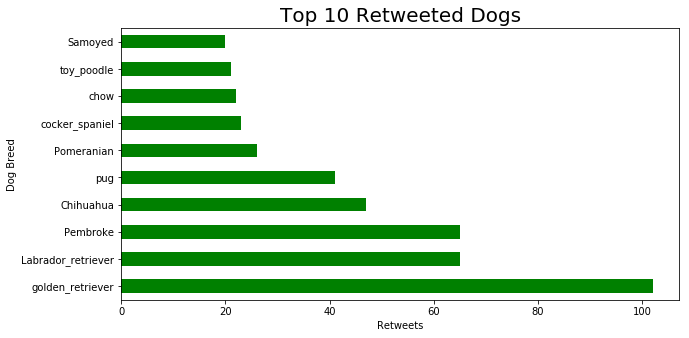

In [51]:
fig = plt.figure(figsize=(10,5))

twitter_archive.groupby('p1').count()['retweet_count'].nlargest(10).plot(kind='barh', color = "green")
plt.title("Top 10 Retweeted Dogs",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("Retweets");

I found that the most retweeted dog was golden retiever 

**bar graph for top 10 Dog breeds by favorite count**

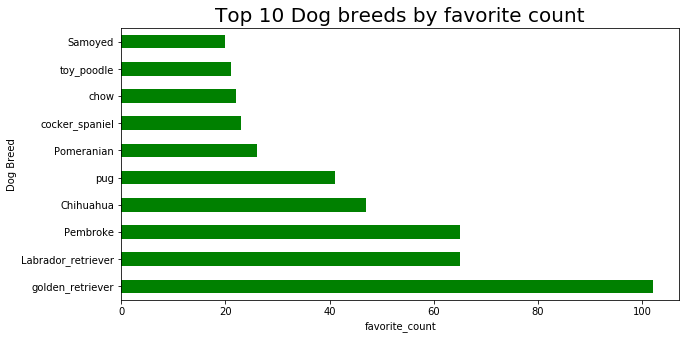

In [52]:
fig = plt.figure(figsize=(10,5))

twitter_archive.groupby('p1').count()['favorite_count'].nlargest(10).plot(kind='barh', color = "green")
plt.title("Top 10 Dog breeds by favorite count",fontsize=20)
plt.ylabel("Dog Breed")
plt.xlabel("favorite_count");

I found that the most favorited dog was golden retiever 

**scatter graph of Retweets and favorites**

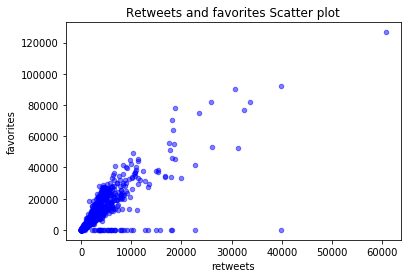

In [53]:
twitter_archive.plot(kind = 'scatter', x = 'retweet_count', y = 'favorite_count', alpha = 0.5, color = 'blue')
plt.xlabel('retweets')
plt.ylabel('favorites')
plt.title('Retweets and favorites Scatter plot');

the graph shows the 2 values corrilate quite strongly 

In [54]:
twitter_archive.corr()

,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,rating_numerator,rating_denominator,favorite_count,favorited,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,truncated
img_num,1.000000,0.203571,0.026727,-0.159956,0.046291,-0.139622,0.060196,-0.003464,-0.011189,0.130761,NaN,NaN,NaN,NaN,0.099298,NaN,0.115753
p1_conf,0.203571,1.000000,0.119421,-0.511298,0.132603,-0.709449,0.109669,-0.003040,-0.015967,0.086403,NaN,NaN,NaN,NaN,0.058216,NaN,0.060664
p1_dog,0.026727,0.119421,1.000000,0.112458,0.635232,0.048832,0.556437,-0.042508,-0.045173,0.074674,NaN,NaN,NaN,NaN,0.023227,NaN,0.078783
p2_conf,-0.159956,-0.511298,0.112458,1.000000,0.100806,0.479027,0.067714,-0.016109,-0.008170,-0.006555,NaN,NaN,NaN,NaN,-0.004578,NaN,-0.007042
p2_dog,0.046291,0.132603,0.635232,0.100806,1.000000,0.042903,0.550845,-0.049022,-0.046792,0.088615,NaN,NaN,NaN,NaN,0.053751,NaN,0.062399
p3_conf,-0.139622,-0.709449,0.048832,0.479027,0.042903,1.000000,0.041786,-0.004725,0.022625,-0.043967,NaN,NaN,NaN,NaN,-0.033382,NaN,-0.022516
p3_dog,0.060196,0.109669,0.556437,0.067714,0.550845,0.041786,1.000000,-0.042895,-0.042931,0.049925,NaN,NaN,NaN,NaN,0.008677,NaN,0.044702
rating_numerator,-0.003464,-0.003040,-0.042508,-0.016109,-0.049022,-0.004725,-0.042895,1.000000,0.109873,0.003872,NaN,NaN,NaN,NaN,0.011769,NaN,-0.003008
rating_denominator,-0.011189,-0.015967,-0.045173,-0.008170,-0.046792,0.022625,-0.042931,0.109873,1.000000,-0.012014,NaN,NaN,NaN,NaN,-0.008553,NaN,-0.013634
favorite_count,0.130761,0.086403,0.074674,-0.006555,0.088615,-0.043967,0.049925,0.003872,-0.012014,1.000000,NaN,NaN,NaN,NaN,0.825408,NaN,0.371163
